## F1 score on bigrams

In [1]:
import re
import string
import json
from nltk.util import bigrams
from collections import Counter
import csv

regex_punctuation = re.compile('[%s]' % re.escape(string.punctuation))

def string_to_tokens(s):
    return ['<bos>'] + re.sub(regex_punctuation, '', s.lower()).split() + ['<eos>']

def calculate_f1_score(pred_bigrams, gt_bigrams):
    shared_ngrams = Counter(pred_bigrams) & Counter(gt_bigrams)
    num_same = sum(shared_ngrams.values())
    
    if num_same == 0:
        return 0
    
    precision = 1.0 * num_same / len(pred_bigrams)
    recall = 1.0 * num_same / len(gt_bigrams)
    f1 = (2 * precision * recall) / (precision + recall)
    return f1

# Load data from JSON file
with open('TurboRandom.json', 'r') as json_file:
    data = json.load(json_file)

# Open CSV file for writing results
csv_filename = 'f1_scores.csv'
with open(csv_filename, 'w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(['Name', 'F1 Score 1', 'F1 Score 2', 'F1 Score 3'])

    for entry in data:
        name = entry['name']
        gt = entry['existing_text']
        pred_text1 = entry['generated_text1']
        pred_text2 = entry['generated_text2']
        pred_text3 = entry['generated_text3']
        
        gt_words = string_to_tokens(gt)
        gt_bigrams = list(bigrams(gt_words))
        
        row_data = [name]
        
        for pred in [pred_text1, pred_text2, pred_text3]:
            pred_words = string_to_tokens(pred)
            pred_bigrams = list(bigrams(pred_words))
            
            f1_score = calculate_f1_score(pred_bigrams, gt_bigrams)
            
            row_data.extend([pred, f1_score])
        
        csv_writer.writerow(row_data)

print(f"Results saved in {csv_filename}")


Results saved in f1_scores.csv


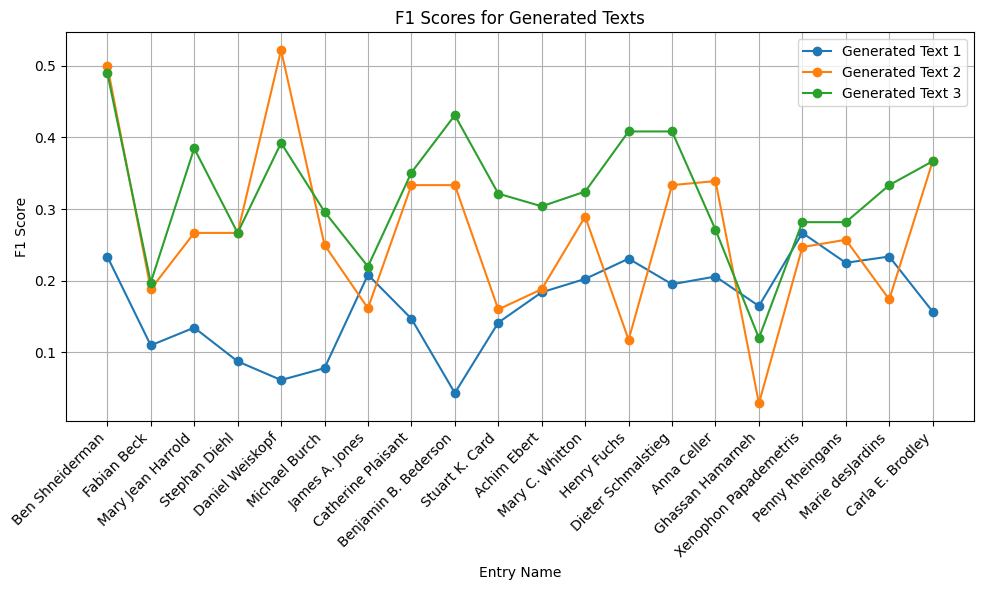

Graph visualization saved as 'f1_scores_graph.png'


In [3]:
import re
import string
import json
from nltk.util import bigrams
from collections import Counter
import csv
import matplotlib.pyplot as plt

regex_punctuation = re.compile('[%s]' % re.escape(string.punctuation))

def string_to_tokens(s):
    return ['<bos>'] + re.sub(regex_punctuation, '', s.lower()).split() + ['<eos>']

def calculate_f1_score(pred_bigrams, gt_bigrams):
    shared_ngrams = Counter(pred_bigrams) & Counter(gt_bigrams)
    num_same = sum(shared_ngrams.values())
    
    if num_same == 0:
        return 0
    
    precision = 1.0 * num_same / len(pred_bigrams)
    recall = 1.0 * num_same / len(gt_bigrams)
    f1 = (2 * precision * recall) / (precision + recall)
    return f1

# Load data from JSON file
with open('TurboRandom.json', 'r') as json_file:
    data = json.load(json_file)

# Prepare data for visualization
names = []
f1_scores1 = []
f1_scores2 = []
f1_scores3 = []

for entry in data:
    name = entry['name']
    gt = entry['existing_text']
    pred_text1 = entry['generated_text1']
    pred_text2 = entry['generated_text2']
    pred_text3 = entry['generated_text3']
    
    gt_words = string_to_tokens(gt)
    gt_bigrams = list(bigrams(gt_words))
    
    f1_score1 = calculate_f1_score(list(bigrams(string_to_tokens(pred_text1))), gt_bigrams)
    f1_score2 = calculate_f1_score(list(bigrams(string_to_tokens(pred_text2))), gt_bigrams)
    f1_score3 = calculate_f1_score(list(bigrams(string_to_tokens(pred_text3))), gt_bigrams)
    
    names.append(name)
    f1_scores1.append(f1_score1)
    f1_scores2.append(f1_score2)
    f1_scores3.append(f1_score3)

# Create a graph visualization
index = list(range(1, len(names) + 1))

plt.figure(figsize=(10, 6))
plt.plot(index, f1_scores1, marker='o', label='Generated Text 1')
plt.plot(index, f1_scores2, marker='o', label='Generated Text 2')
plt.plot(index, f1_scores3, marker='o', label='Generated Text 3')
plt.xlabel('Entry Name')
plt.ylabel('F1 Score')
plt.title('F1 Scores for Generated Texts')
plt.legend()
plt.xticks(index, names, rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()

# Save the graph as an image file
plt.savefig('f1_scores_graph.png')

# Show the graph
plt.show()

print("Graph visualization saved as 'f1_scores_graph.png'")


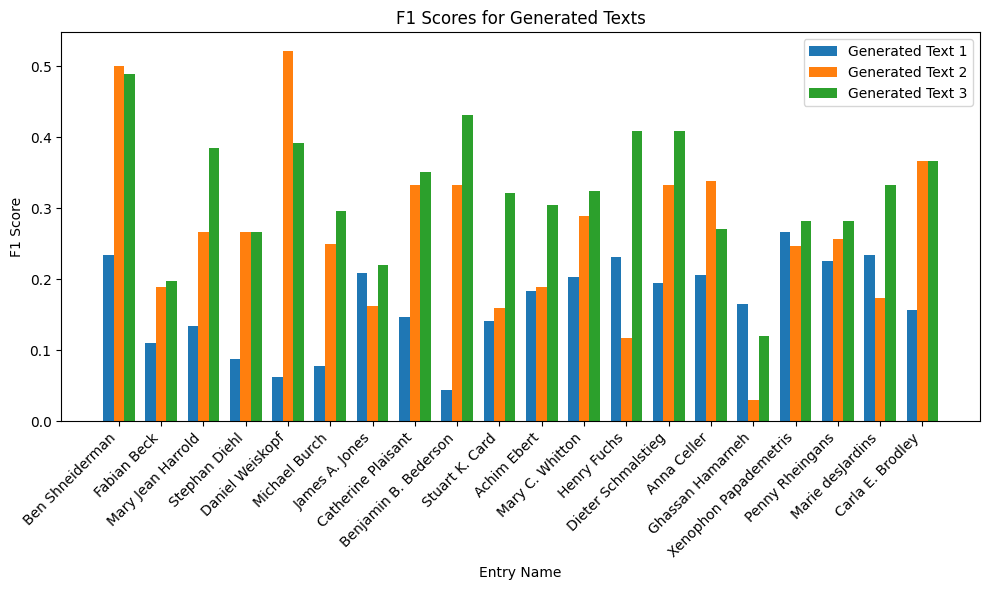

In [4]:
import re
import string
import json
from nltk.util import bigrams
from collections import Counter
import csv
import matplotlib.pyplot as plt
import numpy as np

regex_punctuation = re.compile('[%s]' % re.escape(string.punctuation))

def string_to_tokens(s):
    return ['<bos>'] + re.sub(regex_punctuation, '', s.lower()).split() + ['<eos>']

def calculate_f1_score(pred_bigrams, gt_bigrams):
    shared_ngrams = Counter(pred_bigrams) & Counter(gt_bigrams)
    num_same = sum(shared_ngrams.values())
    
    if num_same == 0:
        return 0
    
    precision = 1.0 * num_same / len(pred_bigrams)
    recall = 1.0 * num_same / len(gt_bigrams)
    f1 = (2 * precision * recall) / (precision + recall)
    return f1

# Load data from JSON file
with open('TurboRandom.json', 'r') as json_file:
    data = json.load(json_file)

# Prepare data for visualization
names = []
f1_scores1 = []
f1_scores2 = []
f1_scores3 = []

for entry in data:
    name = entry['name']
    gt = entry['existing_text']
    pred_text1 = entry['generated_text1']
    pred_text2 = entry['generated_text2']
    pred_text3 = entry['generated_text3']
    
    gt_words = string_to_tokens(gt)
    gt_bigrams = list(bigrams(gt_words))
    
    f1_score1 = calculate_f1_score(list(bigrams(string_to_tokens(pred_text1))), gt_bigrams)
    f1_score2 = calculate_f1_score(list(bigrams(string_to_tokens(pred_text2))), gt_bigrams)
    f1_score3 = calculate_f1_score(list(bigrams(string_to_tokens(pred_text3))), gt_bigrams)
    
    names.append(name)
    f1_scores1.append(f1_score1)
    f1_scores2.append(f1_score2)
    f1_scores3.append(f1_score3)



# Create a bar chart visualization
bar_width = 0.25
index = np.arange(len(names))

plt.figure(figsize=(10, 6))
plt.bar(index - bar_width, f1_scores1, bar_width, label='Generated Text 1')
plt.bar(index, f1_scores2, bar_width, label='Generated Text 2')
plt.bar(index + bar_width, f1_scores3, bar_width, label='Generated Text 3')
plt.xlabel('Entry Name')
plt.ylabel('F1 Score')
plt.title('F1 Scores for Generated Texts')
plt.xticks(index, names, rotation=45, ha='right')
plt.legend()
plt.tight_layout()

# Save the bar chart as an image file
plt.savefig('f1_scores_bar_chart.png')

# Show the bar chart
plt.show()